# Rest API and SQL and non-SQL

https://www.youtube.com/watch?v=OM4aZJW_Ojs

https://dev.mysql.com/downloads/installer/

# Connecting mysql with python

In [1]:
# install this package to establish a connection with msql
# !pip install mysql-connector-python

In [2]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', user='root', passwd='mysql', use_pure=True)
    print(mydb.is_connected())   # check if the connection is established
    mydb.close()
except Exception as e:
    print(str(e))

True


In [3]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', user='root', passwd='mysql', use_pure=True)
    query = "SHOW DATABASES"  # create a query
    cursor = mydb.cursor()    # create a cursor to execute queries
    cursor.execute(query)
    print(cursor.fetchall())
    
except Exception as e:
    mydb.close()
    print(str(e))


[('glassdata',), ('glassdata1',), ('glassdata2',), ('information_schema',), ('mysql',), ('performance_schema',), ('student',), ('sys',)]


In [4]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', user='root', passwd='mysql', use_pure=True)
    print(mydb.is_connected())            # check if the connection is established
    query = "CREATE DATABASE STUDENT;"     # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    print("DATABASE CREATED !!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
1007 (HY000): Can't create database 'student'; database exists


In [5]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', database="STUDENT", user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "CREATE TABLE StudentDetails (Studentid INT(10) AUTO_INCREMENT PRIMARY KEY, FirstName VARCHAR(60)," \
            "LastName VARCHAR(60), RegistrationDate DATE, Class Varchar(20), Section Varchar(10))"     # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    print("TABLE CREATED !!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
1050 (42S01): Table 'studentdetails' already exists


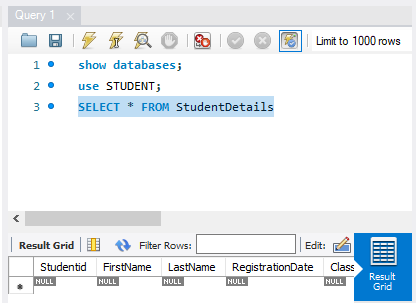

In [6]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', database="STUDENT", user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "INSERT INTO StudentDetails VALUES ('1132', 'Sachin', 'Kumar', '1997-11-11', 'Eleventh', 'A')"     # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    print("Values inserted into the table!!")
    mydb.commit()                         # add the values into the table
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
1062 (23000): Duplicate entry '1132' for key 'studentdetails.PRIMARY'


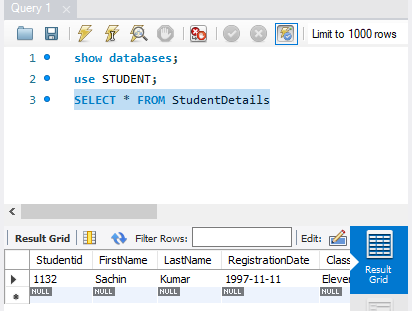

In [7]:
import mysql.connector as connection
import pandas as pd

try:
    mydb = connection.connect(host='localhost', database="STUDENT", user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "UPDATE StudentDetails SET FirstName='Mario', LastName='Rivillas' WHERE Studentid = 1132;"     # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()                         # commit changes
        
    # lets check if the value is updated in the table
    query = "Select * from StudentDetails where Studentid = 1132;"
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close()
    
except Exception as e:
    mydb.close()
    print(str(e))

True
(1132, 'Mario', 'Rivillas', datetime.date(1997, 11, 11), 'Eleventh', 'A')


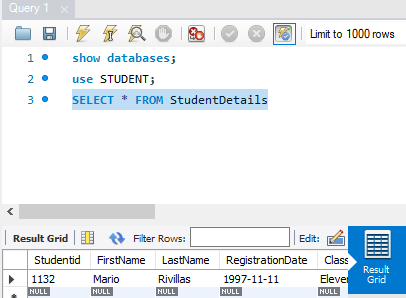

In [8]:
import mysql.connector as connection
import pandas as pd
import csv

try:
    mydb = connection.connect(host='localhost',  user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "Create database GlassData2;"   # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close()                          # close connection
    
    # establish a new connection to the new created database
    mydb = connection.connect(host='localhost', database="GlassData2", user='root', passwd='mysql', use_pure=True) # Connect to an existing db
        
    # lets check if the value is updated in the table
    query = "CREATE TABLE IF NOT EXISTS GlassData2 (Index_Number INT(10), RI float(10,5), Na float(10,5)," \
            "Mg float(10,5), Al float(10,5), Si float(10,5), K float(10,5), Ca float(10,5), Ba float(10,5), Fe float(10,5), Class INT)"     # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")
    
    # read from the file
    with open('D:/lh_data/ineuron/glass_data.txt',"r") as f:
        glass_data = csv.reader(f, delimiter="\n")    # creates a iterative
        for line in enumerate(glass_data):           # reads line by line; (0, ['183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6'])
            for list_ in (line[1]):                  # creates a list from the second elements line[1]
                cursor.execute('INSERT INTO GlassData2 VALUES ({values})'.format(values=(list_)))
    print("Values Inserted!!")
    mydb.commit()
    cursor.close()
    mydb.close()
    
except Exception as e:
    print(str(e))

True
1007 (HY000): Can't create database 'glassdata2'; database exists


In [9]:
import csv
with open('D:/lh_data/ineuron/glass_data.txt',"r") as f:
    #next(f)
    glass_data = csv.reader(f, delimiter="\n")
    print(glass_data)
    for line in enumerate(glass_data):
        print(line)
        for list_ in (line[1]):
            print(list_)
 

(0, ['183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6'])
183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
(1, ['184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6'])
184,1.51969,14.55,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
(2, ['185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.00,6'])
185,1.51115,17.38,0.00,0.34,77.41,0.00,6.68,0.00,0.00,6
(3, ['186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.00,7'])
186,1.53215,16.15,3.22,1.89,72.18,1.76,5.43,1.19,0.00,7


In [10]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', database="GlassData2",  user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "SELECT * FROM GlassData2;"   # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close()

except Exception as e:
    print(str(e))  

True
(183, 1.51916, 14.15, 0.0, 2.09, 72.74, 0.0, 10.88, 0.0, 0.0, 6)
(184, 1.51969, 14.55, 0.0, 0.56, 73.48, 0.0, 11.22, 0.0, 0.0, 6)
(186, 1.53215, 16.15, 3.22, 1.89, 72.18, 1.76, 5.43, 1.19, 0.0, 7)


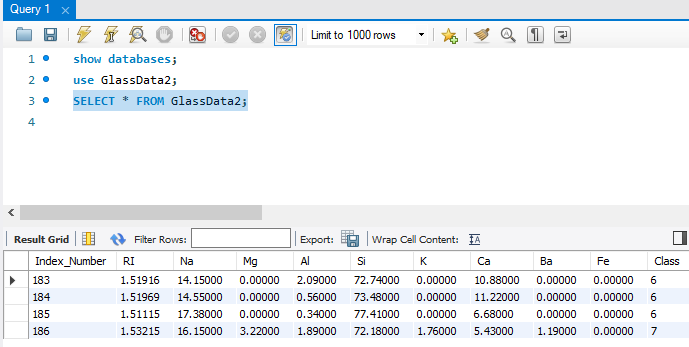

In [11]:
import mysql.connector as connection

try:
    mydb = connection.connect(host='localhost', database="GlassData2",  user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "DELETE FROM GlassData2 WHERE Index_Number=185;"   # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()
    
    # lets check if the value is removed from the table
    query = "SELECT * FROM GlassData2 WHERE Index_Number=185;"   # create a query
    cursor = mydb.cursor()                # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close()                          # close the connection

except Exception as e:
    print(str(e)) 

True


Line 185 removed

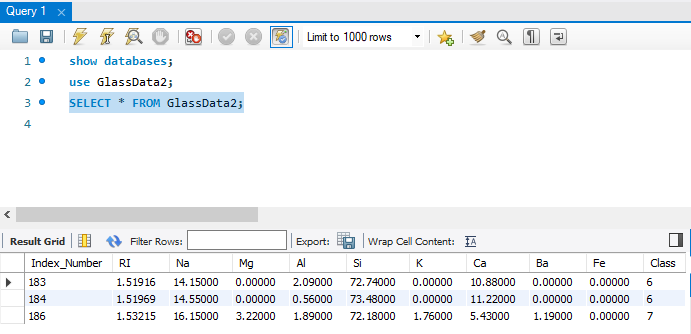

In [12]:
import mysql.connector as connection
import pandas as pd

try:
    mydb = connection.connect(host='localhost', database="GlassData2",  user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "SELECT * FROM GlassData2;"  # create a query
    result_df=pd.read_sql(query,mydb)    # create a dataframe from the query result
    print(result_df)

    mydb.close()                          # close the connection

except Exception as e:
    print(str(e)) 

True
   Index_Number       RI     Na    Mg    Al     Si     K     Ca    Ba   Fe  \
0           183  1.51916  14.15  0.00  2.09  72.74  0.00  10.88  0.00  0.0   
1           184  1.51969  14.55  0.00  0.56  73.48  0.00  11.22  0.00  0.0   
2           186  1.53215  16.15  3.22  1.89  72.18  1.76   5.43  1.19  0.0   

   Class  
0      6  
1      6  
2      7  


In [13]:
import mysql.connector as connection
import pandas as pd

try:
    mydb = connection.connect(host='localhost', database="GlassData2",  user='root', passwd='mysql', use_pure=True) # Connect to an existing db
    print(mydb.is_connected())            # check if the connection is established
    
    query = "SELECT si, COUNT(si), class FROM GlassData2.GlassData2 GROUP BY class ORDER BY si"  # create a query
    result_df=pd.read_sql(query,mydb)    # create a dataframe from the query result
    print(result_df)
    mydb.close()                          # close the connection

except Exception as e:
    print(str(e)) 

True
      si  COUNT(si)  class
0  72.18          1      7
1  72.74          2      6


In [14]:
result_df

,si,COUNT(si),class
0,72.18,1,7
1,72.74,2,6


# SQLITE
will be available with anaconda, does not require installation

In [15]:
import sqlite3
db=sqlite3.connect("company_database.db")

In [16]:
# create table and data insertion
c=db.cursor()
c.execute("CREATE TABLE company1(ID INT, Name TEXT, Age INT, Address TEXT, Salary REAL)")

In [17]:
c.execute("INSERT INTO company1 VALUES(1, 'Jhon', 32, 'bangalore', 100000.00)")
c.execute("INSERT INTO company1 VALUES(2, 'Jhon', 32, 'bangalore', 100000.00)")

In [18]:
data=c.execute("SELECT * FROM company1")
data

In [19]:
for i in data:
    print(i)

(1, 'Jhon', 32, 'bangalore', 100000.0)
(2, 'Jhon', 32, 'bangalore', 100000.0)


In [21]:
# another way to inser table by both key and values
c.execute("INSERT INTO company1 (ID, Name, Age, Address, Salary) VALUES (3, 'Jhon3', 42, 'bangalore3', 110000.00)")
c.execute("INSERT INTO company1 (ID, Name, Age, Address, Salary) VALUES (4, 'Jhon4', 52, 'Maduri', 90000.00)")
c.execute("INSERT INTO company1 (ID, Name, Age, Address, Salary) VALUES (5, 'Jhon5', 42, 'bangalore5', 130000.00)")

In [22]:
data=c.execute("SELECT * FROM company1")
data

In [23]:
for i in data:
    print(i)

(1, 'Jhon', 32, 'bangalore', 100000.0)
(2, 'Jhon', 32, 'bangalore', 100000.0)
(3, 'Jhon3', 42, 'bangalore3', 110000.0)
(4, 'Jhon4', 52, 'Maduri', 90000.0)
(5, 'Jhon5', 42, 'bangalore5', 130000.0)


In [24]:
db.commit()
db.close()

In [31]:
# Data filtering operations
db = sqlite3.connect("company_database.db")   # connect to a database
c = db.cursor()                               # assign cursor
data = c.execute("SELECT * FROM company1 WHERE Salary > 100000.00")
for i in data:
    print(i)
data = c.execute("SELECT Name FROM company1 WHERE Address='bangalore' ")
for i in data:
    print(i) 
data = c.execute("SELECT ID, Name, Age FROM company1 ORDER BY Age DESC ")
for i in data:
    print(i) 

(3, 'Jhon3', 42, 'bangalore3', 110000.0)
(5, 'Jhon5', 42, 'bangalore5', 130000.0)
('Jhon',)
('Jhon',)
(4, 'Jhon4', 52)
(3, 'Jhon3', 42)
(5, 'Jhon5', 42)
(1, 'Jhon', 32)
(2, 'Jhon', 32)


In [32]:
# DROP a table

import sqlite3
db=sqlite3.connect("company_database.db")
c = db.cursor()  

c.execute("CREATE TABLE food(Name TEXT, Calores INT)")
c.execute("INSERT INTO food VALUES ('Mango',60)")
c.execute("INSERT INTO food VALUES ('Samosa',260)")

data = c.execute (" SELECT * FROM food")
for i in data:
    print(i)


('Mango', 60)
('Samosa', 260)


In [33]:
c.execute("DROP TABLE IF EXISTS food")
c.execute("DROP TABLE food")

OperationalError: no such table: food